# Data Preprocessing

In [1]:
# import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#importing the dataset get from Kaggle 
books = pd.read_csv (r'C:\Users\user\OneDrive\Desktop\Artificial Intelligence\dataset folder\books.csv')
ratings = pd.read_csv (r'C:\Users\user\OneDrive\Desktop\Artificial Intelligence\dataset folder\ratings.csv')
tags = pd.read_csv (r'C:\Users\user\OneDrive\Desktop\Artificial Intelligence\dataset folder\tags.csv')
bookTags = pd.read_csv (r'C:\Users\user\OneDrive\Desktop\Artificial Intelligence\dataset folder\book_tags.csv')

In [3]:
# display the head of book dataset 
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
# book info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [5]:
# drop columns that is not using
books.drop(['isbn13', 'isbn','original_title','language_code'], axis='columns', inplace=True)

In [6]:
# see if book dataset have any null 
books.isnull().sum()

id                            0
book_id                       0
best_book_id                  0
work_id                       0
books_count                   0
authors                       0
original_publication_year    21
title                         0
average_rating                0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
image_url                     0
small_image_url               0
dtype: int64

In [7]:
# replacing the null value in year published with the median
books['original_publication_year'] = books['original_publication_year'].replace(np.NaN, books['original_publication_year'].median())

In [8]:
# see the unqiue value of year
books.original_publication_year.unique()

array([ 2008.,  1997.,  2005.,  1960.,  1925.,  2012.,  1937.,  1951.,
        2000.,  1813.,  2003.,  2011.,  1949.,  1945.,  1947.,  2009.,
        1999.,  1954.,  2010.,  2002.,  1998.,  2007.,  1595.,  1988.,
        1993.,  1950.,  1996.,  2006.,  1868.,  1847.,  2001.,  1953.,
        1974.,  1979.,  1932.,  1884.,  1952.,  2015.,  1995.,  2004.,
        1969.,  1936.,  1985.,  1818.,  1977.,  1811.,  -720.,  1946.,
        1859.,  1990.,  1964.,  1989.,  1958.,  1973.,  1967.,  1911.,
        1891.,  1897.,  1963.,  1844.,  2013.,  1862.,  1961.,  1876.,
        1962.,  1955.,  1991.,  1600.,  1965.,  1939.,  1908.,  1850.,
        2014.,  1606.,  1860.,  1942.,  1978.,  1815.,  1877.,  1986.,
        1866.,  1922.,  1987.,  1851.,  1982.,  1843.,  1976.,  1994.,
        1915.,  1956.,  1980.,  1865.,  1817.,  1957.,  1926.,  1943.,
        1938.,  1966.,  1981.,  2016.,  1992.,  1984.,  1972.,  1882.,
        1895.,  1899.,  1983.,  -750.,  1900.,  1975.,  1971.,  1603.,
      

In [9]:
# modify those non-logic year
books.loc[(books.original_publication_year > 2021) | (books.original_publication_year < 1300), 'original_publication_year'] = np.NAN
books.original_publication_year.fillna(round(books.original_publication_year.mean()), inplace = True)
books.original_publication_year.unique()

array([2008., 1997., 2005., 1960., 1925., 2012., 1937., 1951., 2000.,
       1813., 2003., 2011., 1949., 1945., 1947., 2009., 1999., 1954.,
       2010., 2002., 1998., 2007., 1595., 1988., 1993., 1950., 1996.,
       2006., 1868., 1847., 2001., 1953., 1974., 1979., 1932., 1884.,
       1952., 2015., 1995., 2004., 1969., 1936., 1985., 1818., 1977.,
       1811., 1991., 1946., 1859., 1990., 1964., 1989., 1958., 1973.,
       1967., 1911., 1891., 1897., 1963., 1844., 2013., 1862., 1961.,
       1876., 1962., 1955., 1600., 1965., 1939., 1908., 1850., 2014.,
       1606., 1860., 1942., 1978., 1815., 1877., 1986., 1866., 1922.,
       1987., 1851., 1982., 1843., 1976., 1994., 1915., 1956., 1980.,
       1865., 1817., 1957., 1926., 1943., 1938., 1966., 1981., 2016.,
       1992., 1984., 1972., 1882., 1895., 1899., 1983., 1900., 1975.,
       1971., 1603., 1929., 1968., 1838., 1903., 1886., 1940., 1887.,
       1931., 1611., 1814., 1719., 1513., 1880., 1923., 1869., 1849.,
       1892., 1904.,

In [10]:
# check if any duplicated 
books.duplicated().any()

False

In [11]:
# book info 
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   authors                    10000 non-null  object 
 6   original_publication_year  10000 non-null  float64
 7   title                      10000 non-null  object 
 8   average_rating             10000 non-null  float64
 9   ratings_count              10000 non-null  int64  
 10  work_ratings_count         10000 non-null  int64  
 11  work_text_reviews_count    10000 non-null  int64  
 12  ratings_1                  10000 non-null  int64  
 13  ratings_2                  10000 non-null  int6

In [12]:
# ratings dataset 
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [13]:
# ratings dataset info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [14]:
# check any duplicated in ratings dataset 
ratings.duplicated().any()

True

In [15]:
# drop duplicated in ratings
ratings = ratings.drop_duplicates()

In [16]:
# the updated ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980112 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  980112 non-null  int64
 1   user_id  980112 non-null  int64
 2   rating   980112 non-null  int64
dtypes: int64(3)
memory usage: 29.9 MB


In [17]:
# tags dataset
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [18]:
# tags dataset info
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [19]:
# check any duplicated in tags dataset
tags.duplicated().any()

False

In [20]:
# bookTags dataset 
bookTags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [21]:
# bookTags dataset info 
bookTags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [22]:
# check any duplicated in bookTags
bookTags.duplicated().any()

True

In [23]:
# drop the duplicates in bookTags
bookTags = bookTags.drop_duplicates()

## Data Understanding and Data Visualization

In [24]:
print("Total records : ",len(books))
print("Number of books : {0}".format(len(books.book_id.unique())))
print("Number of titles : {0}".format(len(books.title.unique())))
print("Number of authors : {0}".format(len(books.authors.unique())))
print("Number of average rating : {0}".format(len(books.average_rating.unique())))
print("Number of publication years : {0}".format(len(books.original_publication_year.unique())))

Total records :  10000
Number of books : 10000
Number of titles : 9964
Number of authors : 4664
Number of average rating : 184
Number of publication years : 261


In [25]:
data = pd.merge(books,ratings,on='book_id', how='inner')
data.head()

,id,book_id,best_book_id,work_id,books_count,authors,original_publication_year,title,average_rating,ratings_count,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314,3
1,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588,1
2,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077,2
3,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487,3
4,2,3,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2900,3


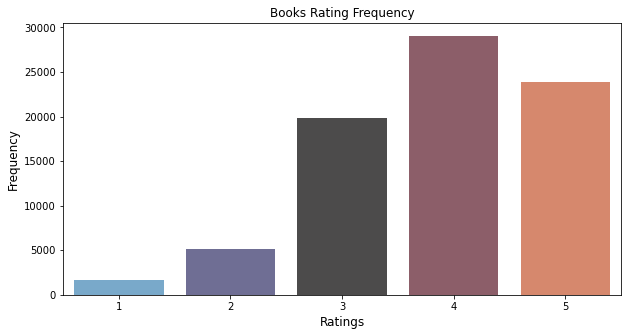

In [26]:
# rating 1 to 5 with it's frequency
# Plotting a bar graph of the rating frequency for each ratings
# in the column 'rating'
rating_count  = data['rating'].value_counts()
rating_count = rating_count[:,]
plt.figure(figsize=(10,5))
sns.barplot(rating_count.index, rating_count.values, alpha=0.8, palette="icefire")
plt.title('Books Rating Frequency')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Ratings', fontsize=12)
plt.show()

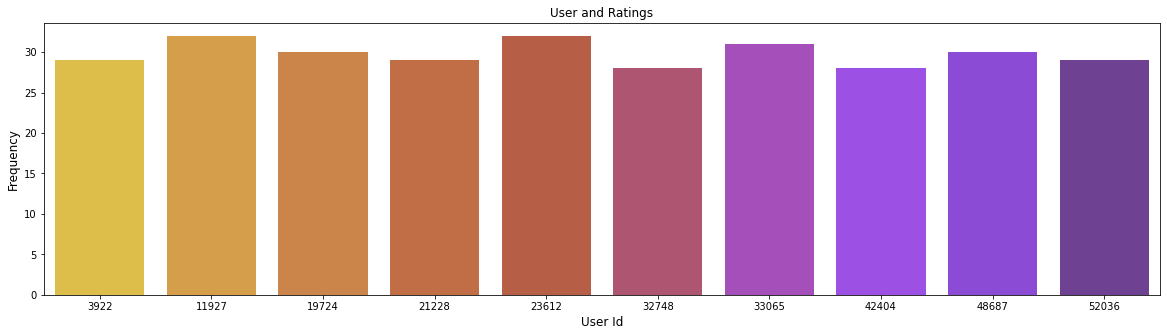

In [27]:
# rating 1 to 5 with it's frequency
# Plotting a bar graph of the rating frequency for each ratings
# in the column 'rating'
rating_count  = data['user_id'].value_counts()
rating_count = rating_count.sort_values(ascending=False)[:10,]
plt.figure(figsize=(20,5))
sns.barplot(rating_count.index, rating_count.values, alpha=0.8, palette="gnuplot_r")
plt.title('User and Ratings')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('User Id', fontsize=12)
plt.show()

In [28]:
#Top 5 highest rated books out of all
print("The books being rated \"5\" in the records count")
books = data.groupby('title')['rating'].apply(lambda x: x[x == 5].count()).sort_values(ascending=False)
books = pd.DataFrame({'title': books.index, 'number of rating 5': books.values})[0:5]
books

The books being rated "5" in the records count


,title,number of rating 5
0,Still Life with Woodpecker,79
1,The Beautiful and Damned,75
2,The Adventures of Huckleberry Finn,69
3,Hard Times,65
4,Villa Incognito,65


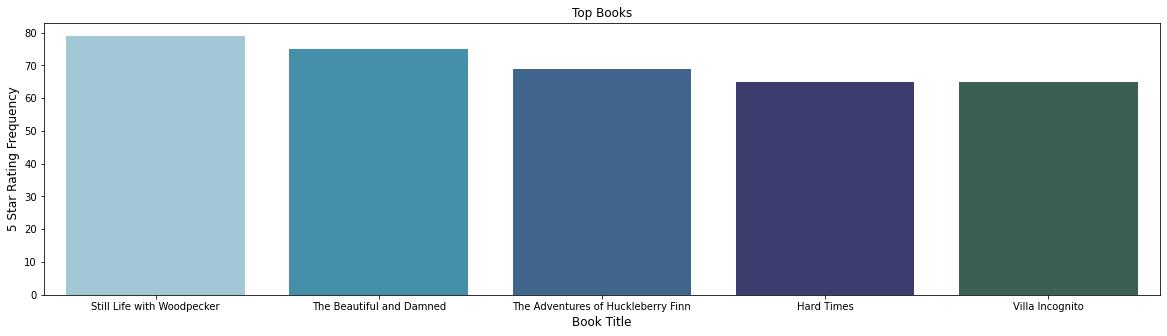

In [29]:
#plotting
books_plot = data.groupby('title')['rating'].apply(lambda x: x[x == 5].count()).sort_values(ascending=False)[0:5]
plt.figure(figsize=(20,5))
sns.barplot(books_plot.index, books_plot.values, alpha=0.8, palette=("ocean_r"))
plt.title('Top Books')
plt.ylabel('5 Star Rating Frequency', fontsize=12)
plt.xlabel('Book Title', fontsize=12)
plt.show()

In [30]:
#Top 5 high rated authors 
print("The authors being rated \"5\" in the records count")
authors = data.groupby('authors')['rating'].apply(lambda x: x[x == 5].count()).sort_values(ascending=False)
authors = pd.DataFrame({'authors': authors.index, 'number of rating 5': authors.values})[0:5]
authors

The authors being rated "5" in the records count


,authors,number of rating 5
0,Kurt Vonnegut Jr.,525
1,John Grisham,486
2,Michael Crichton,353
3,Darren Shan,352
4,Janet Evanovich,350


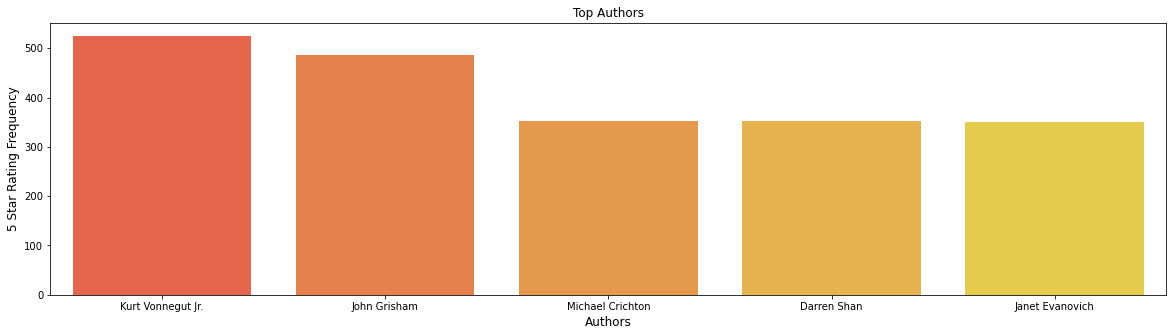

In [31]:
#plotting
authors_plot = data.groupby('authors')['rating'].apply(lambda x: x[x == 5].count()).sort_values(ascending=False)[0:5]
plt.figure(figsize=(20,5))
sns.barplot(authors_plot.index, authors_plot.values, alpha=0.8, palette=("autumn"))
plt.title('Top Authors')
plt.ylabel('5 Star Rating Frequency', fontsize=12)
plt.xlabel('Authors', fontsize=12)
plt.show()

In [32]:
#Top 5 high rated years book
print("The years published being rated \"5\" in the records count")
years = data.groupby('original_publication_year')['rating'].apply(lambda x: x[x == 5].count()).sort_values(ascending=False)
years = pd.DataFrame({'original_publication_year': years.index, 'number of rating 5': years.values})[0:5]
years

The years published being rated "5" in the records count


,original_publication_year,number of rating 5
0,2005.0,1409
1,2003.0,1179
2,2001.0,1162
3,2002.0,1044
4,2000.0,1037


In [33]:
#calculate the mean of book
columns = ['title','rating']
mean_ratings = pd.DataFrame(data, columns=columns)
mean_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79583 entries, 0 to 79582
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   79583 non-null  object
 1   rating  79583 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [34]:
mean_ratings = mean_ratings.groupby(['title']).mean()
mean_ratings

,rating
title,
'Salem's Lot,3.932432
"'Tis (Frank McCourt, #2)",3.959596
1421: The Year China Discovered America,3.734694
1776,3.930000
1984,3.170000
...,...
Year of Wonders,3.760000
You Shall Know Our Velocity!,3.490000
Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,3.550000


In [35]:
mean_ratings = mean_ratings.sort_values('rating',ascending=False)
mean_ratings

,rating
title,
Still Life with Woodpecker,4.777778
The Beautiful and Damned,4.660000
Villa Incognito,4.625000
"Peter and the Shadow Thieves (Peter and the Starcatchers, #2)",4.557143
The Taste of Home Cookbook,4.550000
...,...
The Woman in White,2.880000
The Chamber,2.880000
"Pearls of Lutra (Redwall, #9)",2.800000


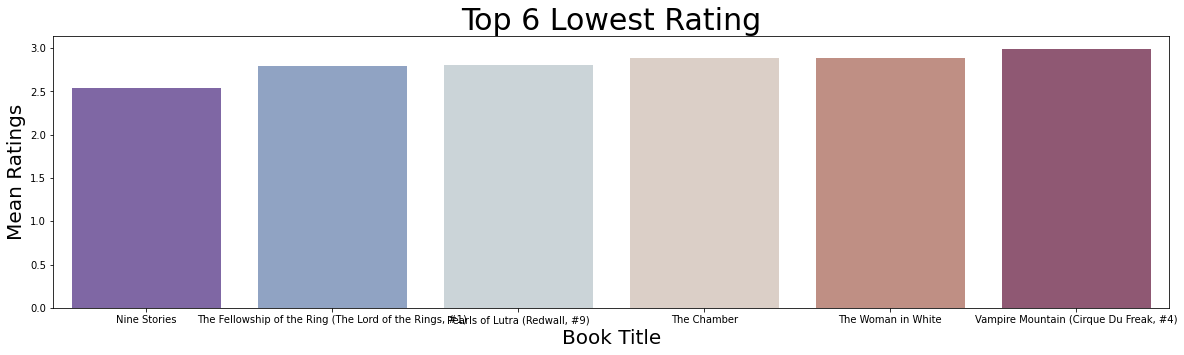

In [36]:
#plotting
authors_plot = mean_ratings['rating'].sort_values(ascending=True)[0:6]
plt.figure(figsize=(20,5))
sns.barplot(authors_plot.index, authors_plot.values, alpha=0.8, palette=("twilight_shifted"))
plt.title('Top 6 Lowest Rating',fontsize=30)
plt.ylabel('Mean Ratings', fontsize=20)
plt.xlabel('Book Title', fontsize=20)
plt.show()

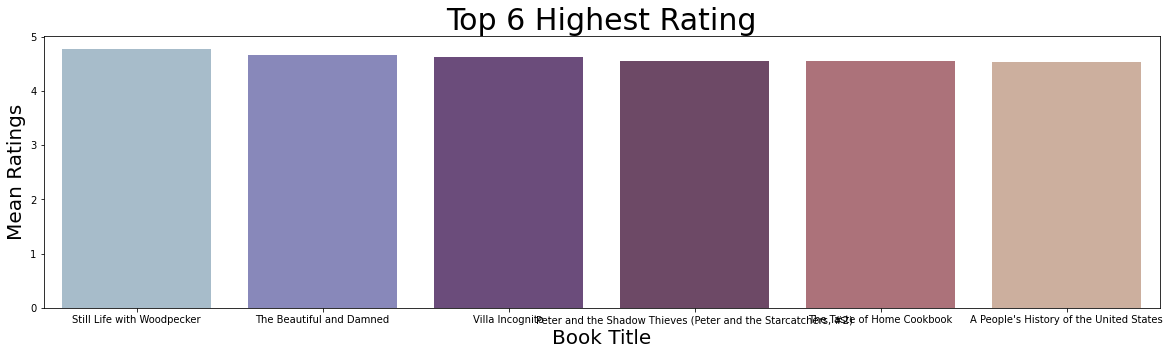

In [37]:
#plotting
authors_plot = mean_ratings['rating'].sort_values(ascending=False)[0:6]
plt.figure(figsize=(20,5))
sns.barplot(authors_plot.index, authors_plot.values, alpha=0.8, palette=("twilight"))
plt.title('Top 6 Highest Rating',fontsize=30)
plt.ylabel('Mean Ratings', fontsize=20)
plt.xlabel('Book Title', fontsize=20)
plt.show()